# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

import numpy as np
%load_ext autoreload
%autoreload 2
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

par = model.par

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

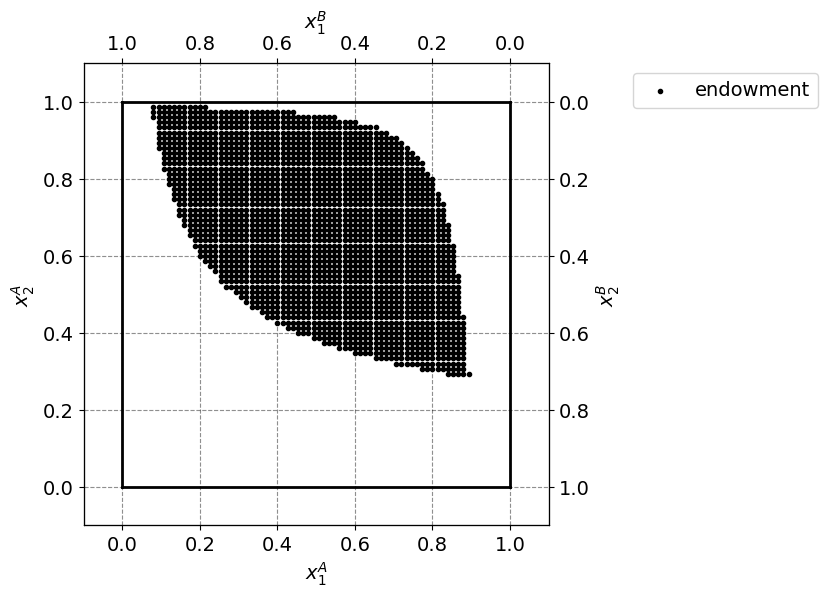

In [8]:
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Define number of steps N:
N = 75
steps = 1 / N

# Use numpy arrange to create pareto efficient allocations (which we call C)
C = [(x1A, x2A) for x1A in np.arange(0, 1 + steps, steps) for x2A in np.arange(0, 1 + steps, steps) for x1B in [1-x1A] for x2B in [1-x2A]
            if model.utility_A(x1A, x2A) >= model.utility_A(par.w1A, par.w2A)
            and model.utility_B(1 - x1A, 1 - x2A) >= model.utility_B(par.w1B, par.w2B)]
#print(C)
# Unpacking pareto allocations for person A
x1A_C, x2A_C = zip(*C)


# A
ax_A.scatter(x1A_pareto, x2A_pareto,marker='.',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

Explain your code and procedure

In [9]:
#First we define price for good 1
p1 = [(0.5 + 2*i/75) for i in range(76)]

#Here we make calculations for errors in market for good 1 and 2
errors = [model.check_market_clearing(x) for x in p1]
eps1 = [x[0] for x in errors]
eps2 = [x[1] for x in errors]

#We import panda to create DataFramce
import pandas as pd

#Here we create DataFrame 
df = pd.DataFrame(errors, columns=['eps1', 'eps2'])
print(df)

        eps1      eps2
0  -0.133333 -0.433333
1  -0.156962 -0.417333
2  -0.178313 -0.401333
3  -0.197701 -0.385333
4  -0.215385 -0.369333
..       ...       ...
71 -0.502507  0.702667
72 -0.503581  0.718667
73 -0.504632  0.734667
74 -0.505660  0.750667
75 -0.506667  0.766667

[76 rows x 2 columns]


# Question 3

Explain your code and procedure

In [10]:
#In question 3 we find the market clearing price 1 (when price 2=1).
#we can see in question 2 that the price is somewhere between 0,5 and 2,5

# Iterate over the eps1 values to find when error = 0
for i, error in enumerate(eps1):
    if abs(error) < 0.01:  # Adjust the tolerance as needed
        p1_with_error_zero = p1[i]
        print("p1 value that makes error = 0:", p1_with_error_zero)
        break
else:
    print("No p1 value found that makes error = 0")

No p1 value found that makes error = 0


ADD CONCISE CONLUSION.